# Chest and Lung Cancer Prediction Convolutional Neural Network

### Importing the libraries

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 343 images belonging to 2 classes.


### Preprocessing the Test set

In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 112 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [6]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64,3]))

C:\Users\ANANTHU\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Step 2 - Pooling

In [8]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [10]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [11]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [12]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [13]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [14]:
from PIL import Image

### Training the CNN on the Training set and evaluating it on the Test set

In [15]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 30)

Epoch 1/30


C:\Users\ANANTHU\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.4881 - loss: 0.7071 - val_accuracy: 0.7946 - val_loss: 0.5535
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.8180 - loss: 0.5554 - val_accuracy: 0.8393 - val_loss: 0.3692
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.7733 - loss: 0.4545 - val_accuracy: 0.9464 - val_loss: 0.2009
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.8610 - loss: 0.2961 - val_accuracy: 0.9911 - val_loss: 0.0689
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.8861 - loss: 0.2765 - val_accuracy: 0.9821 - val_loss: 0.1006
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.9154 - loss: 0.2444 - val_accuracy: 1.0000 - val_loss: 0.0535
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.9491 - loss: 0.1730 - val_accuracy: 0.9732 - val_loss: 0.0596
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.9279 - loss: 0.1466 - val_accuracy: 0.9732 - val_loss: 0

## Part 4 - Making a single prediction

In [16]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cancer (4).png', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'normal'
else:
  prediction = 'cancer'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [17]:
print(prediction)

cancer


In [18]:
# Evaluate the model on the test set
test_loss, test_accuracy = cnn.evaluate(test_set)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.9705 - loss: 0.1856
Test Accuracy: 97.32%


In [20]:
model_json = cnn.to_json()
with open("lungCancer.json",'w') as json_file:
    json_file.write(model_json)
cnn.save("lungCancer.h5")

In [35]:
from keras.models import model_from_json

In [36]:
json_file = open("lungCancer.json", "r")
model_json = json_file.read()
json_file.close()
model1 = model_from_json(model_json)
model1.load_weights("lungCancer.h5")

In [37]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

def predict_and_show_image(model, img_path, target_size=(64, 64)):
    # Load the image
    test_image = image.load_img(img_path, target_size=target_size)

    # Convert the image to an array and expand dimensions to match the model input shape
    test_image_array = image.img_to_array(test_image)
    test_image_array = np.expand_dims(test_image_array, axis=0)

    # Predict the class of the image
    result = model1.predict(test_image_array)
    
    # Map the result to a class label
    prediction = 'normal' if result[0][0] == 1 else 'cancer'

    # Print the prediction
    print(f'Prediction: {prediction}')

    # Display the image using matplotlib
    plt.imshow(image.load_img(img_path))
    plt.title(f'Prediction: {prediction}')
    plt.axis('off')  # Hide the axes
    plt.show()




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Prediction: cancer


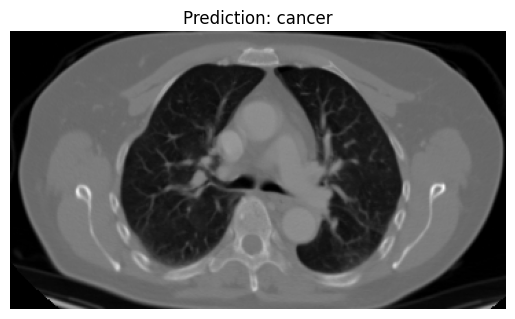

In [38]:
# Example usage:
predict_and_show_image(model1, 'dataset/single_prediction/cancer (8).png')